In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
from pandas.plotting import scatter_matrix

In [2]:
data=pd.read_csv("House price data.csv") #we keep the data in the data variable

In [3]:
data.head() #for getting the n number of rows

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
data.shape #for getting the rows and column

(13320, 9)

In [5]:
data.info() #getting info about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
for column in data.columns: #we do value count on every values
    print(data[column].value_counts())
    print("*"*20)

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
********************
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
14-Jul               1
17-Jan               1
15-Aug               1
15-Jun               1
16-Oct               1
Name: availability, Length: 81, dtype: int64
********************
Whitefield                          540
Sarjapur  Road                      399
Electronic City                     302
Kanakpura Road                      273
Thanisandra                         234
                                   ... 
Sahyadri Layout                       1
Housing Board Layout Vijay Nagar      1
Huttanahalli                          1
Puttappa Layout                       1
Banaswadi,                            1
Name: location, Length: 1305, dtype: int64
********************
2 BHK     

In [7]:
data.isna().sum() #how many null values in our data from here we see that on society max number of null values exist

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [8]:
data.drop(columns=["area_type","availability","society","balcony"],inplace=True) #here we droping these 4 column bcz of no use and max null values are there


In [9]:
data.describe() #here we are calculating some statistical data like mean std percent etc

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [10]:
data.info() #after droping the 4 coloum these are remaining data columns left

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [11]:
data["location"].value_counts() #there are only one missing value or null 

Whitefield                          540
Sarjapur  Road                      399
Electronic City                     302
Kanakpura Road                      273
Thanisandra                         234
                                   ... 
Sahyadri Layout                       1
Housing Board Layout Vijay Nagar      1
Huttanahalli                          1
Puttappa Layout                       1
Banaswadi,                            1
Name: location, Length: 1305, dtype: int64

In [12]:
data["location"]= data["location"].fillna("Sarjahapur Road") #here we fill the null value with S road and it 400 become

In [13]:
data["size"].value_counts() #we know in size there are 16 null values

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
10 BHK           2
11 Bedroom       2
12 Bedroom       1
19 BHK           1
18 Bedroom       1
14 BHK           1
27 BHK           1
43 Bedroom       1
13 BHK           1
16 BHK           1
Name: size, dtype: int64

In [14]:
data["size"] = data["size"].fillna("2 BHK") #here we fill the 16 missing values with 2 BHK

In [15]:
data["bath"].value_counts() #we now on bathroom there are 76 missing values

2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
11.0       3
13.0       3
16.0       2
14.0       1
40.0       1
18.0       1
27.0       1
15.0       1
Name: bath, dtype: int64

In [16]:
data["bath"] = data["bath"].fillna(data["bath"].median()) #here un bath we knoy there is numerical value so that we first find median and then we put this on null points

In [17]:
data.info() #all num values are cleard congrats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [18]:
data["bhk"] = data["size"].str.split().str.get(0).astype(int) #we store the int value in bhk column

In [19]:
data[data.bhk>20] # flats bhk greater then 20

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [20]:
data["total_sqft"].unique() #here we get the range problem we want int value or float

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [21]:
def convertRange(x):
    temp = x.split("-") #split the value on the basis of hyphon -
    if len(temp) ==2: #if split we get two value value - value
        return (float(temp[0])+ float(temp[1]))/2 #converting value 1and value 2 to float then findng mean
    try: #if we gwt one vale after mean
        return float(x)
    except: #or return none
        return None

In [22]:
data["total_sqft"]= data["total_sqft"].apply(convertRange) # we apply the convertRange function on total_sqft

In [23]:
data.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


## Price Per Sqft 

In [24]:
data["price_per_sqft"] = data["price"]*100000 / data["total_sqft"] # convert price data in rupee then devide it by sqft data and keep it in price_per_sqft data

In [25]:
data["price_per_sqft"]

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13320, dtype: float64

<AxesSubplot:xlabel='total_sqft', ylabel='price'>

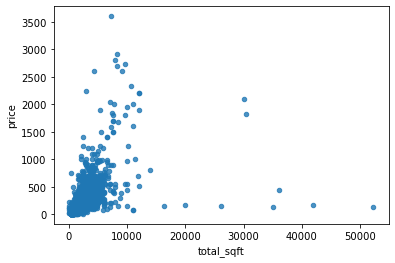

In [26]:
data.plot(kind="scatter", x="total_sqft" ,y="price" , alpha=0.8)

In [27]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [28]:
data["location"].value_counts() #here we have to reduce the location 

Whitefield                          540
Sarjapur  Road                      399
Electronic City                     302
Kanakpura Road                      273
Thanisandra                         234
                                   ... 
Sahyadri Layout                       1
Housing Board Layout Vijay Nagar      1
Huttanahalli                          1
Puttappa Layout                       1
Banaswadi,                            1
Name: location, Length: 1306, dtype: int64

In [29]:
data["location"] = data["location"].apply(lambda x:x.strip()) # we reduce the location who come less then 10 time in a dataset
location_count= data["location"].value_counts()

In [30]:
location_count

Whitefield                   541
Sarjapur  Road               399
Electronic City              304
Kanakpura Road               273
Thanisandra                  237
                            ... 
RMC YARD                       1
Hanuman Nagar                  1
Rajanna Layout                 1
KPC Layout                     1
Yemlur, Old Airport Road,      1
Name: location, Length: 1295, dtype: int64

In [31]:
location_count_less_10 = location_count[location_count<=10] #there are 1054 locations which appered in the dataseet less then 10 times
location_count_less_10

Naganathapura                10
Sector 1 HSR Layout          10
BTM 1st Stage                10
Ganga Nagar                  10
Nagadevanahalli              10
                             ..
RMC YARD                      1
Hanuman Nagar                 1
Rajanna Layout                1
KPC Layout                    1
Yemlur, Old Airport Road,     1
Name: location, Length: 1054, dtype: int64

In [32]:
data["location"] = data["location"].apply(lambda x:"other" if x in location_count_less_10 else x) #here we write other if location comes less then 10 times

In [33]:
data["location"].value_counts() #here we reduce the length of location from 1306 to 242 and less then 10 time come locations are in other

other                 2886
Whitefield             541
Sarjapur  Road         399
Electronic City        304
Kanakpura Road         273
                      ... 
Nehru Nagar             11
Marsur                  11
Banjara Layout          11
Tindlu                  11
Pattandur Agrahara      11
Name: location, Length: 242, dtype: int64

## Detection and removing outlier

In [34]:
data.describe() #we can see the min t_sqft is 1.00 but there is nothing we found bcz 1sqft is very min so we remove this outlier

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [35]:
(data["total_sqft"]/data["bhk"]).describe() #here we do how many sqft in 1 bhk we found that in min is 0.2500 sqft so this is impossible

count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [36]:
data = data[((data["total_sqft"]/data["bhk"]) >=300)] #flat whos t_sqft/bhk is less then 300 we remove it and keep above 300 sqft min
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.559537,111.382401,2.650838,6303.979357
std,1261.271296,1.077938,152.077329,0.976678,4162.237981
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [37]:
data.shape

(12530, 7)

In [38]:
data.price_per_sqft.describe() #here we found 176470.588235 max and this is very big so we remove this outlier

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [39]:
def remove_outlier_sqft(df):  #here we are removing outlier of price_per_sqft max
    df_output = pd.DataFrame()
    for key,subdf in df.groupby("location"):
        m = np.mean(subdf.price_per_sqft)#mean of p_p_sqft
        
        st= np.std(subdf.price_per_sqft)#standard dev of p_p_sqft
        
        gen_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]# keep the price in b/w this and store in gen_df
        df_output = pd.concat([df_output,gen_df],ignore_index =True)# we concate the gen_df with output
    return df_output
data = remove_outlier_sqft(data)
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000
mean,1508.440608,2.471702,91.286372,2.574896,5659.062876
std,880.694214,0.979449,86.342786,0.897649,2265.774749
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1110.000000,2.000000,49.000000,2.000000,4244.897959
50%,1286.000000,2.000000,67.000000,2.000000,5175.600739
75%,1650.000000,3.000000,100.000000,3.000000,6428.571429
max,30400.000000,16.000000,2200.000000,16.000000,24509.803922


Text(0, 0.5, 'Count')

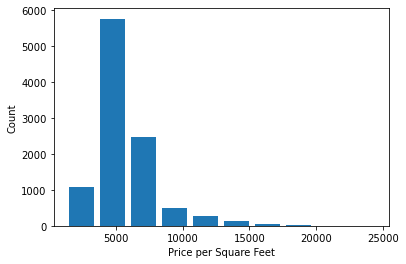

In [40]:
plt.hist(data.price_per_sqft, rwidth=0.8)
plt.xlabel('Price per Square Feet')
plt.ylabel('Count')

We can observe that around 5000-10000 we have majority of out data points and our data follows a normal distribution with a bell
shaped curve.

In [41]:
def bhk_outlier_remove(df):
    exclude_indices = np.array([]) #it store the indices which we does'nt want it use for excluiding purpose
    
    for location,location_df in df.groupby("location"): #go to the location and make sub df of the location
        bhk_stats = {} #it store bhk stats
        
        for bhk, bhk_df in location_df.groupby("bhk"): 
            bhk_stats[bhk] = {                        
                "mean": np.mean(bhk_df.price_per_sqft), 
                 "std": np.std(bhk_df.price_per_sqft),
                 "count": bhk_df.shape[0]
                
            }
           
        for bhk, bhk_df in location_df.groupby("bhk"):
            stats = bhk_stats.get(bhk-1)
            if stats and stats["count"]>5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats["mean"])].index.values)
                
    return df.drop(exclude_indices,axis="index")
        
    

Text(0, 0.5, 'Count')

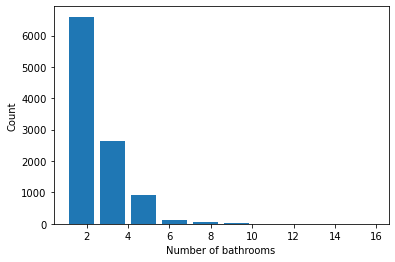

In [42]:
plt.hist(data.bath, rwidth=0.8)
plt.xlabel('Number of bathrooms')
plt.ylabel('Count')

In [43]:
data=bhk_outlier_remove(data)

In [44]:
data.shape #7361 rows and 7 column

(7361, 7)

In [45]:
data 

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
10292,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
10293,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10296,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
10297,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


In [46]:
data.drop(columns=["size","price_per_sqft"],inplace=True) #here we removing size and price_per_sqft columns bcz this is only use for removing outliers and for cleaned data wehave to remove it

## Cleaned Data

In [47]:
data.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [48]:
data.to_csv("cleaned_data.csv") #we save the cleaned data in this

In [49]:
X=data.drop(columns=["price"]) #we excluide the price from th data and put it in Y
Y=data["price"]

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [51]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [52]:
print(X_train.shape) #we make a train and a test set for training and testing purpose
print(X_test.shape)

(5888, 4)
(1473, 4)


## Applying LinearRegression

In [53]:
column_trans = make_column_transformer((OneHotEncoder(sparse=False),["location"]),#we put onehot on location because location contain catagorical data so we convert it to numerical
                                       remainder="passthrough") #here we do column trans we do OneHotE on location bcz these only suitable for catagorising

In [54]:
scaler = StandardScaler() #to scale the features into unit and it remove mean.

In [55]:
lr= LinearRegression(normalize=True) #Linear regression is used for finding linear relationship between target and one or more predictors. 

In [56]:
pipe = make_pipeline(column_trans,scaler,lr)#pipeline class allows sticking multiple processes into a single scikit-learn estimator. pipeline class has fit, predict and score method just like any other estimator


In [57]:
pipe.fit(X_train,Y_train)# data first goes on col trans then do onhot after scale and then last go on lineraR as we fit in pipe. 

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression(normalize=True))])

In [58]:
Y_pred_lr = pipe.predict(X_test)

In [59]:
r2_score(Y_test,Y_pred_lr)

0.8233211174669253

## Applying Lasso

In [60]:
lasso = Lasso()

In [61]:
pipe = make_pipeline(column_trans,scaler,lasso) 

In [62]:
pipe.fit(X_train,Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [63]:
Y_pred_lasso = pipe.predict(X_test)#it give less then Linregr..
r2_score(Y_test,Y_pred_lasso)

0.812828565077272

## Applying Ridge

In [64]:
ridge =Ridge()

In [65]:
pipe =make_pipeline(column_trans,scaler,ridge)

In [66]:
pipe.fit(X_train,Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [67]:
Y_pred_ridge = pipe.predict(X_test)
r2_score(Y_test,Y_pred_ridge)

0.82341466333127

In [68]:
print("LinearRegression:",r2_score(Y_test, Y_pred_lr)) #here we found that the linear and ridge is same r2 value so we dump Ridge
print("Lasso:", r2_score(Y_test, Y_pred_lasso)) #Root mean square error or root mean square deviation is one
#of the most commonly used measures for evaluating the quality of predictions.
print("Ridge:" ,r2_score(Y_test, Y_pred_ridge))

LinearRegression: 0.8233211174669253
Lasso: 0.812828565077272
Ridge: 0.82341466333127


In [ ]:
import pickle

In [ ]:
pickle.dump(pipe,open("RidgeModel","wb")) #here we dump Ridge model using pkl